In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr
from keras.preprocessing.image import ImageDataGenerator

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
data_dir = 'data/train'
validation_dir = 'data/val'

In [5]:
image_exts = ['jpeg','jpg','bmp','png']

In [6]:
#for image_class in os.listdir(data_dir): 
#    for image in os.listdir(os.path.join(data_dir, image_class)):
#        image_path = os.path.join(data_dir, image_class, image)
#        try: 
#            img = cv2.imread(image_path)
#            tip = imghdr.what(image_path)
#            if tip not in image_exts: 
#                print('Image not in ext list {}'.format(image_path))
#                os.remove(image_path)
#        except Exception as e: 
#            print('Issue with image {}'.format(image_path))

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import scipy

In [8]:
#batch_size=32
img_height = 100
img_width = 100

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    #batch_size=batch_size
)

Found 3357 files belonging to 7 classes.
Using 3022 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size =(img_height,img_width),
    #batch_size=batch_size
)

Found 3357 files belonging to 7 classes.
Using 335 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['apples', 'avocado', 'bananas', 'orange', 'pineapple', 'tomatoes', 'watermelon']


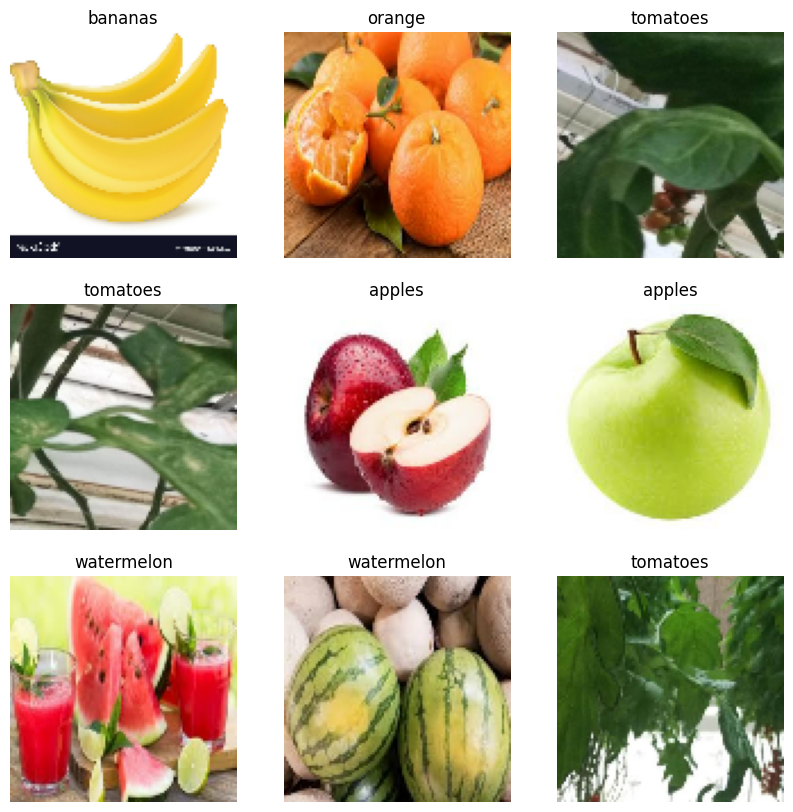

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 3)
(32,)


In [14]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import keras
from tensorflow.keras import layers

In [16]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [17]:
num_classes = len(class_names)

In [18]:
model = Sequential([    
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense((128), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
    ])

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                      

In [21]:
hist = model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
95/95 [==============================] - 38s 259ms/step - loss: 1.9671 - accuracy: 0.3604 - val_loss: 1.5319 - val_accuracy: 0.4925
Epoch 2/30
95/95 [==============================] - 24s 251ms/step - loss: 1.2176 - accuracy: 0.5463 - val_loss: 1.0016 - val_accuracy: 0.6567
Epoch 3/30
95/95 [==============================] - 25s 266ms/step - loss: 1.0182 - accuracy: 0.6314 - val_loss: 0.9671 - val_accuracy: 0.6776
Epoch 4/30
95/95 [==============================] - 23s 246ms/step - loss: 0.9120 - accuracy: 0.6787 - val_loss: 1.0272 - val_accuracy: 0.6149
Epoch 5/30
95/95 [==============================] - 23s 246ms/step - loss: 0.8631 - accuracy: 0.7005 - val_loss: 0.9598 - val_accuracy: 0.6746
Epoch 6/30
95/95 [==============================] - 23s 244ms/step - loss: 0.8013 - accuracy: 0.7174 - val_loss: 0.7604 - val_accuracy: 0.7134
Epoch 7/30
95/95 [==============================] - 23s 242ms/step - loss: 0.7667 - accuracy: 0.7214 - val_loss: 0.7527 - val_accuracy: 0.7373

In [22]:
hist.history

{'loss': [1.9670807123184204,
  1.217598557472229,
  1.0181986093521118,
  0.9120391011238098,
  0.8631463050842285,
  0.8012779951095581,
  0.7666767239570618,
  0.7364158034324646,
  0.7217154502868652,
  0.6744747757911682,
  0.6566791534423828,
  0.6355802416801453,
  0.6471784114837646,
  0.5867996215820312,
  0.5920900702476501,
  0.5414575934410095,
  0.556642472743988,
  0.5291616916656494,
  0.5415278077125549,
  0.50473552942276,
  0.48016485571861267,
  0.47398844361305237,
  0.4475677013397217,
  0.47160804271698,
  0.4204472303390503,
  0.41692590713500977,
  0.42188364267349243,
  0.3882799446582794,
  0.3963738679885864,
  0.4019441604614258],
 'accuracy': [0.3603573739528656,
  0.5463269352912903,
  0.631369948387146,
  0.6786895990371704,
  0.7005294561386108,
  0.7174056768417358,
  0.7213765978813171,
  0.7428855299949646,
  0.7465254664421082,
  0.7604235410690308,
  0.771674394607544,
  0.7749834656715393,
  0.7693580389022827,
  0.7921906113624573,
  0.78821974992

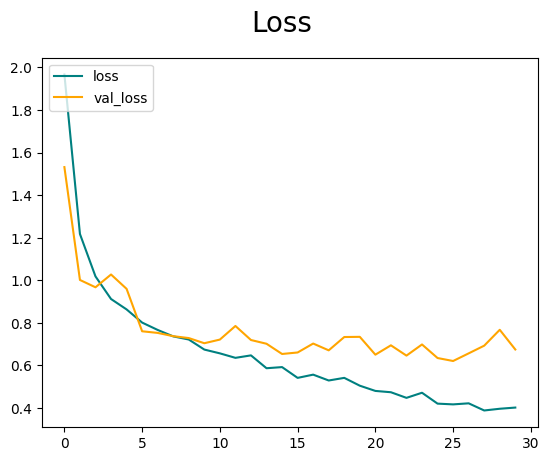

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

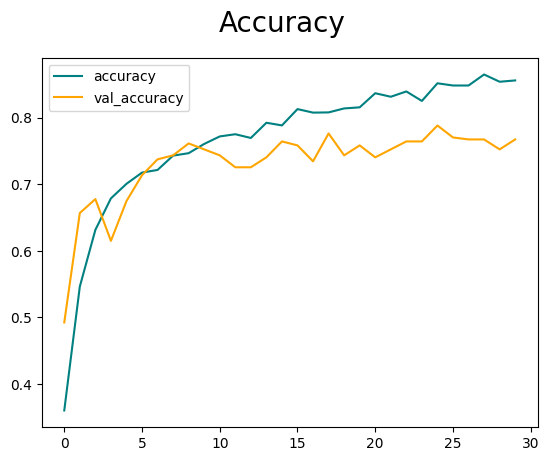

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [25]:
from tensorflow.keras.preprocessing import image
from keras.utils.np_utils import to_categorical

In [26]:
img_path = 'images/banana.jpg'

In [27]:
img = tf.keras.utils.load_img(img_path, target_size=(img_height,img_width))

In [28]:
img = tf.keras.utils.img_to_array(img)

In [29]:
img = tf.expand_dims(img, 0)

In [30]:
predictions = model.predict(img)

1/1 [==============================] - 0s 119ms/step


In [31]:
score = tf.nn.softmax(predictions[0])

In [32]:
np.sum(score)

1.0

In [33]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to bananas with a 31.18 percent confidence.


In [34]:
from tensorflow.keras.models import load_model
import pickle

In [35]:
model.save(os.path.join('models','food_products.h5'))

In [44]:
f = open('models/labels.pickle', "wb")
f.write(pickle.dumps(class_names))
f.close()

TypeError: write() argument must be str, not bytes

In [40]:
file_name = os.path.basename(img_path).split('.')[0]
file_extension = os.path.splitext(img_path)[1][1:]

file_path='kb/{}.scs'.format(file_name)

f = open(file_path, "w")

txt="{}\n<- concept_image;\n<= nrel_includes: concept_{};\n<- rrel_key_sc_element: ...\n(*\n<-sc_illustration;;\n<=nrel_sc_text_translation: ...\n(*\n-> rrel_example: \"{}\" (*\n=> nrel_format: format_{};;\n *);;\n*);;\n*);\n<- sc_node_not_relation;;".format(file_name,class_names[np.argmax(score)],img_path,file_extension)

In [41]:
print(txt)

banana
<- concept_image;
<= nrel_includes: concept_bananas;
<- rrel_key_sc_element: ...
(*
<-sc_illustration;;
<=nrel_sc_text_translation: ...
(*
-> rrel_example: "images/banana.jpg" (*
=> nrel_format: format_jpg;;
 *);;
*);;
*);
<- sc_node_not_relation;;


In [43]:
f.write(txt)

f.close()